In [1]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('titanic.csv',usecols=['Cabin','Ticket','SibSp','Parch','Survived'])

In [15]:
df['number'] = df['SibSp'] + df['Parch']
df.drop(columns=['SibSp','Parch'],inplace=True)
df.head()

,Survived,Ticket,Cabin,number
0,0,330911,NaN,0
1,1,363272,NaN,1
2,0,240276,NaN,0
3,0,315154,NaN,0
4,1,3101298,NaN,2


In [16]:
df['number'].unique()

array([ 0,  1,  2,  4,  3,  5,  7,  6, 10], dtype=int64)

Text(0.5, 1.0, 'Passengers travelling with')

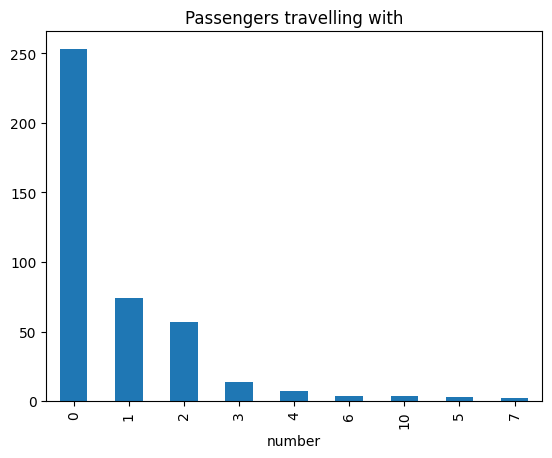

In [17]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [18]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

# extract categorical part
df['number_categorical'] =np.where(df['number_numerical'].isnull(),df['number'],np.nan)

In [19]:
df.head()

,Survived,Ticket,Cabin,number,number_numerical,number_categorical
0,0,330911,NaN,0,0,NaN
1,1,363272,NaN,1,1,NaN
2,0,240276,NaN,0,0,NaN
3,0,315154,NaN,0,0,NaN
4,1,3101298,NaN,2,2,NaN


In [20]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [21]:
/df['Ticket'].unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

In [24]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')
df['cabin_cat'] = df['Cabin'].str[0]

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_11044\3089170357.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['cabin_num'] = df['Cabin'].str.extract('(\d+)')


,Survived,Ticket,Cabin,number,number_numerical,number_categorical,cabin_num,cabin_cat
0,0,330911,NaN,0,0,NaN,NaN,NaN
1,1,363272,NaN,1,1,NaN,NaN,NaN
2,0,240276,NaN,0,0,NaN,NaN,NaN
3,0,315154,NaN,0,0,NaN,NaN,NaN
4,1,3101298,NaN,2,2,NaN,NaN,NaN


In [25]:
df['cabin_cat'].value_counts()

cabin_cat
C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: count, dtype: int64

In [26]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s:s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                errors = 'coerce',
                                downcast = 'integer')

df['ticket_cat'] = df['Ticket'].apply(lambda s:s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])

In [27]:
df.head()

,Survived,Ticket,Cabin,number,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,0,330911,NaN,0,0,NaN,NaN,NaN,330911,NaN
1,1,363272,NaN,1,1,NaN,NaN,NaN,363272,NaN
2,0,240276,NaN,0,0,NaN,NaN,NaN,240276,NaN
3,0,315154,NaN,0,0,NaN,NaN,NaN,315154,NaN
4,1,3101298,NaN,2,2,NaN,NaN,NaN,3101298,NaN
